In [ ]:
import cv2

img = cv2.imread('/content/Picture1.jpg')


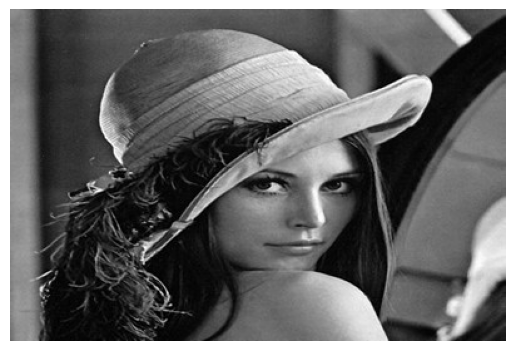

In [ ]:
import matplotlib.pyplot as plt
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()


In [ ]:
height, width, channels = image.shape
print(f'Image Size: {width}x{height}px, Channels: {channels}')


Image Size: 396x265px, Channels: 3


In [ ]:
total_pixels = height * width
print(f'Total number of pixels: {total_pixels}')


Total number of pixels: 104940


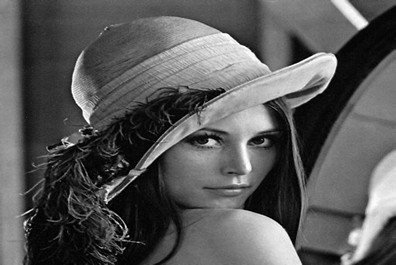

In [ ]:
from google.colab.patches import cv2_imshow
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imwrite('gray_image.jpg', gray_image)
cv2_imshow(gray_image)

Number of black pixels: 80430
Size of image: (265, 396)


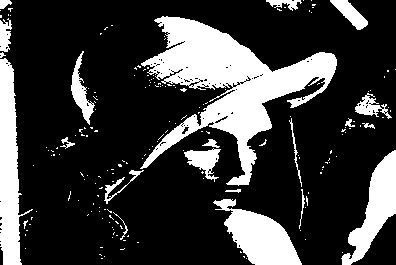

In [ ]:

_, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)
cv2.imwrite('binary_image.jpg', binary_image)

black_pixels = cv2.countNonZero(cv2.bitwise_not(binary_image))
print(f'Number of black pixels: {black_pixels}')
print(f'Size of image: {binary_image.shape}')
cv2_imshow(binary_image)


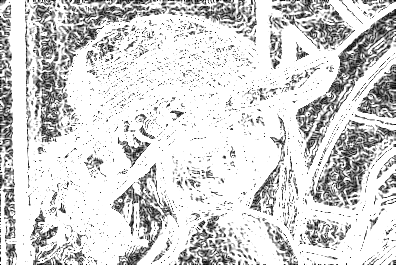

In [ ]:
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
sobel = cv2.magnitude(sobelx, sobely)
cv2.imwrite('sobel_image.jpg', sobel)
cv2_imshow(sobel)

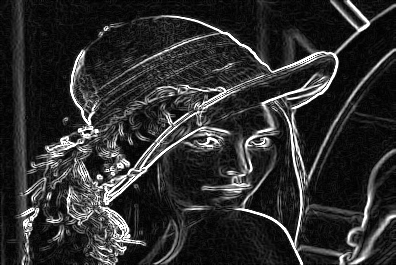

In [ ]:
import numpy as np
kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

prewittx = cv2.filter2D(gray_image, cv2.CV_64F, kernelx)
prewitty = cv2.filter2D(gray_image, cv2.CV_64F, kernely)


prewitt = cv2.magnitude(prewittx, prewitty)
cv2.imwrite('prewitt_image.jpg', prewitt)
cv2_imshow(prewitt)

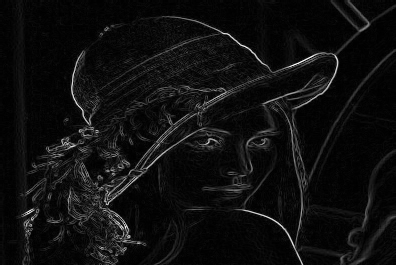

In [ ]:
roberts_cross_kernelx = np.array([[1, 0], [0, -1]])
roberts_cross_kernely = np.array([[0, 1], [-1, 0]])
# Convert the image to grayscale before applying the Roberts operator
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Apply filter2D with ddepth set to cv2.CV_64F
robertsx = cv2.filter2D(gray_image, cv2.CV_64F, roberts_cross_kernelx)
robertsy = cv2.filter2D(gray_image, cv2.CV_64F, roberts_cross_kernely)
roberts = cv2.magnitude(robertsx, robertsy)
cv2.imwrite('roberts_image.jpg', roberts)
cv2_imshow(roberts)

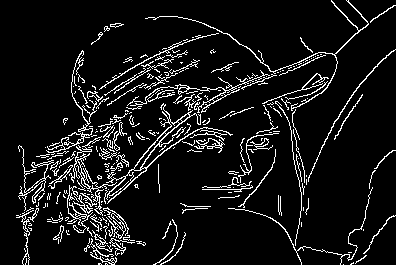

In [ ]:
edges = cv2.Canny(image, 100, 200)
cv2.imwrite('canny_edges.jpg', edges)
cv2_imshow(edges)

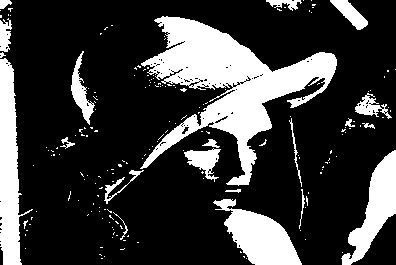

In [ ]:
_, global_thresh_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)
cv2.imwrite('global_thresh_image.jpg', global_thresh_image)
cv2_imshow(global_thresh_image)

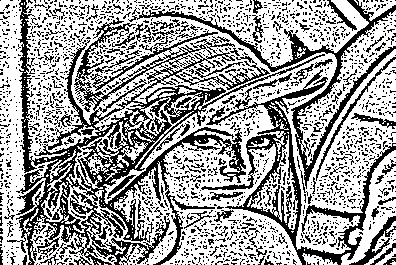

In [ ]:
adaptive_thresh_image = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
cv2.imwrite('adaptive_thresh_image.jpg', adaptive_thresh_image)
cv2_imshow(adaptive_thresh_image)

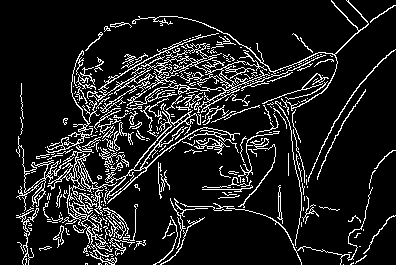

In [ ]:
edges_for_segmentation = cv2.Canny(gray_image, 50, 150)
cv2.imwrite('edges_for_segmentation.jpg', edges_for_segmentation)
cv2_imshow(edges_for_segmentation)

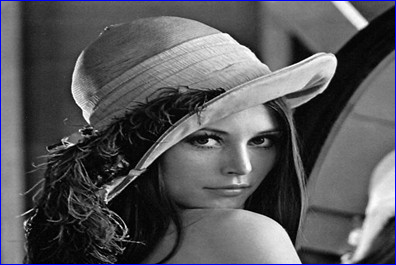

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

sure_bg = cv2.dilate(opening, kernel, iterations=3)

dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

ret, markers = cv2.connectedComponents(sure_fg)

markers += 1

markers[unknown == 0] = 0

markers = cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]

cv2.imwrite('watershed_image.jpg', image)
cv2_imshow(image)